In [1]:
import estimator as est

In [2]:
MyEstimator = est.estimator("Base_Data12_20.csv", """ ; |; """, *["Voltage", "Angle", "Time"])

/home/isaac/Documents/University/TCC/PyControlGym/estimator.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.data = pd.read_csv(file, delimiter=delimit)


In [3]:
MyEstimator.frameCol

{'Var Voltage': array(['Voltage Value: 0.000000', 'Voltage Value: 0.000000',
        'Voltage Value: 0.000000', ..., 'Voltage Value: -3.900000',
        'Voltage Value: -3.600000', 'Voltage Value: -3.600000'],
       dtype=object),
 'Var Angle': array(['Angle Value: 110.819672', 'Angle Value: 95.956284',
        'Angle Value: 96.830605', ..., 'Angle Value: 166.557373',
        'Angle Value: 188.743164', 'Angle Value: 168.306015'], dtype=object),
 'Var Time': array(['Time Value Ms: 0.000000', 'Time Value Ms: 5.000000',
        'Time Value Ms: 10.000000', ..., 'Time Value Ms: 21975.000000',
        'Time Value Ms: 21980.000000', 'Time Value Ms: 21985.000000'],
       dtype=object)}

In [4]:
MyEstimator.splitByCharacter("Voltage", ":", -1)
MyEstimator.splitByCharacter("Angle", ":", -1)
MyEstimator.splitByCharacter("Time", ":", -1)

In [5]:
MyEstimator.frameCol

{'Var Voltage': array([ 0. ,  0. ,  0. , ..., -3.9, -3.6, -3.6]),
 'Var Angle': array([110.819672,  95.956284,  96.830605, ..., 166.557373, 188.743164,
        168.306015]),
 'Var Time': array([0.0000e+00, 5.0000e+00, 1.0000e+01, ..., 2.1975e+04, 2.1980e+04,
        2.1985e+04])}

In [6]:
MyEstimator.makeLinear("Angle", 15.84, 344, 30, True)

In [7]:
MyEstimator.scaleByFactor("Angle", 0.0174533)

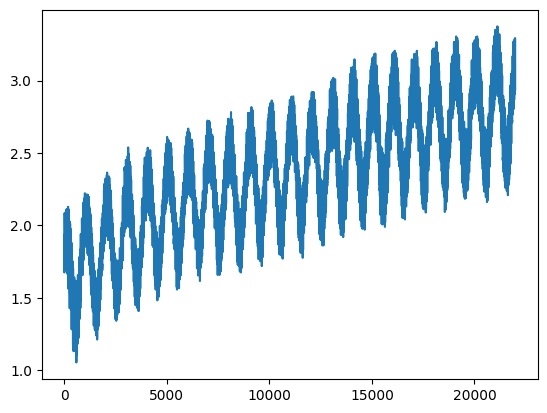

In [8]:
import matplotlib.pyplot as plt
plt.plot(MyEstimator.getVector("Time")[:], MyEstimator.getVector("Angle")[:])

In [9]:
import numpy as np
k=2 
inputs = np.array([[0, 0, 0 ,0]])
for elem in MyEstimator.getVector("Angle"):
    inputs = np.append(inputs, [[MyEstimator.getVector("Angle")[k-1], MyEstimator.getVector("Angle")[k-2], 
             MyEstimator.getVector("Voltage")[k-1], MyEstimator.getVector("Angle")[k-2]]], axis = 0)
    k+=1
    if k > MyEstimator.getVector("Angle").shape[0] - 1:
        break

In [10]:
MyEstimator.runRLS(0.85, 4, inputs[1:], MyEstimator.getVector("Angle"), 4000)

array([[ 9.95862632e-01],
       [ 2.05941175e-03],
       [-3.65308483e-06],
       [ 2.05941175e-03]])

[[-0.0003263]]


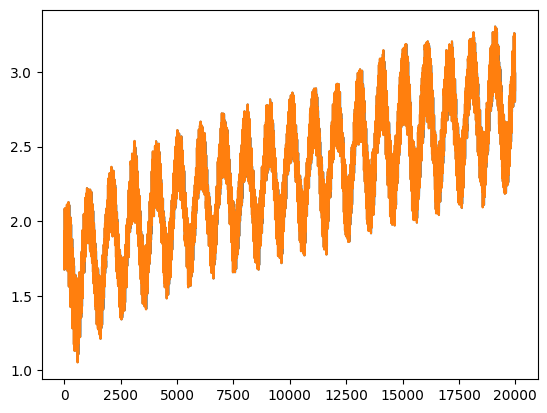

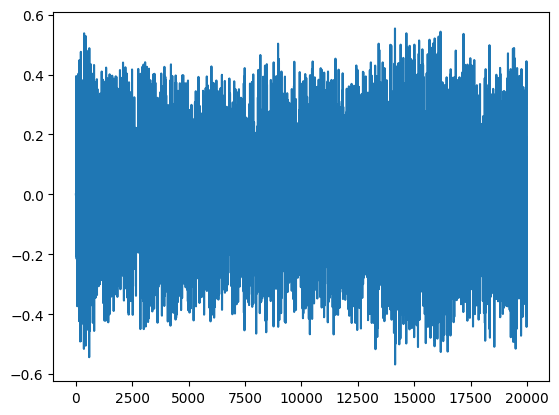

In [12]:
result = MyEstimator.Plot_answer(MyEstimator.getVector("Time"), 4, inputs[1:], MyEstimator.getVector("Angle"), 2, 4000, "plot")